# Science on Twitter
### What are the most popular Arxiv papers on Twitter?

To find out what is hot right now, this code visualises the data gathered by listening to the stream of Twitter statuses with keyword 'arxiv'- [www.Arxiv.org](www.Arxiv.org) is a popular open library of scientific papers on many topics- and gathers links to the scientific papers.

Take a look! Tables below show number of tweets that contained a link to a given Arxiv paper during the data gathering period.

The data was gathered during 24 hours on 18th and 19th January 2017 .

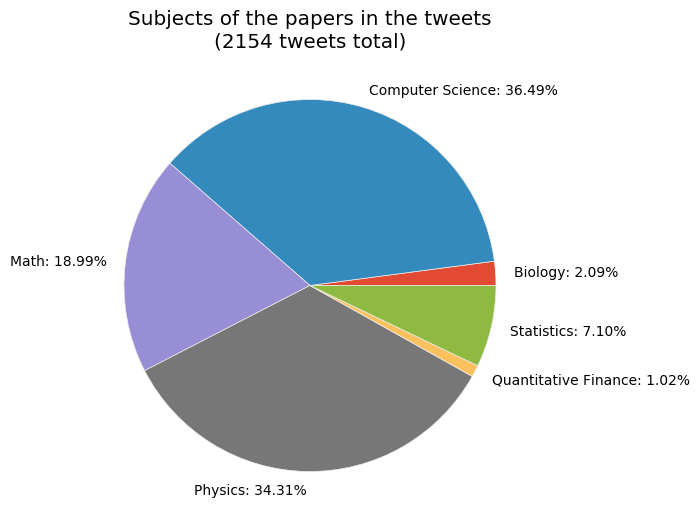

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import os.path as op
from IPython.display import display,HTML
from ipywidgets import interact

pd.set_option('display.max_colwidth', -1)

#Load and sort the data
D=pd.read_json(op.join('data','data.json'),convert_axes=False)
D.sort_values(by='Tweets', ascending=False, inplace=True)
d=D[['Title','Area','Link','Tweets']]

#count articles in every area
pie_data=d.pivot(columns='Area',values='Tweets').sum(axis=0)
pie_data.name=''
pie_data.index=pie_data.index+': '+((100*pie_data/pie_data.sum()).apply('{0:.2f}'.format))+ '%'

#plot piechart
pie_data.plot.pie(figsize=(6,6),
                      title='Subjects of the papers in the tweets\n('+str(int(pie_data.sum()))+' tweets total)')
plt.show()

def linkformatter(link):
    return '<a href='+link+' target="_blank">' + link + "</a>"

def show_table(area):
    if area=='All':
        print
        display(HTML('<h1>10 most popular Arxiv papers on Twitter</h1>'))
        print
        display(HTML(d.head(10).to_html(index=False,escape=False,formatters={'Link': linkformatter})))
    else:
        print
        display(HTML('<h1>10 most popular '+area.lower()+' papers'))
        print
        display(HTML(d[d.Area==area].head(10).to_html(index=False,escape=False,formatters={'Link': linkformatter})))
    
areas=['All','Physics','Computer Science','Statistics','Math','Biology','Quantitative Finance']

In [ ]:
interact(show_table, area=areas);

## Something to think about

Computer science is quite prominent among the papers on Twitter, more than a third of the papers falls within this category. However, Arxiv was originaly founded as a repository of physics papers, and to this day, physics papers comprise approximately half of all papers submitted every month ([source](https://arxiv.org/help/stats/2016_by_area/index)). In contrast, computer science papers amount for less than 20% of submitted papers. This effect is even more pronounced if one realizes that on Arxiv, machine learning is actually a subcategory of statistics.

This can mean a few things:
 - Physics is simply not as fashionable as neural networks (although as a studied physicist, I must immediatly reply: 'Preposterous!' :) )
 - Physicists don't communicate their research on Twitter as much as computer scientists.
 - Effect is statisticly not signoficant (I have yet to look into that.)
 
A quick glance at the table of the most popular papers suggest, that the first option is probably true:
even the three most popular physics papers are about neural networks!